In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset from the CSV file
data = pd.read_csv('polynomial200.csv', header=None, names=['X_data', 'Y_data'])

# Divide data into training- and test data
train_data = data[:100]  # first 100 rows for training data
test_data = data[100:]   # remaining 100 rows for test data
test_data.columns = ['X_data', 'Y_data']

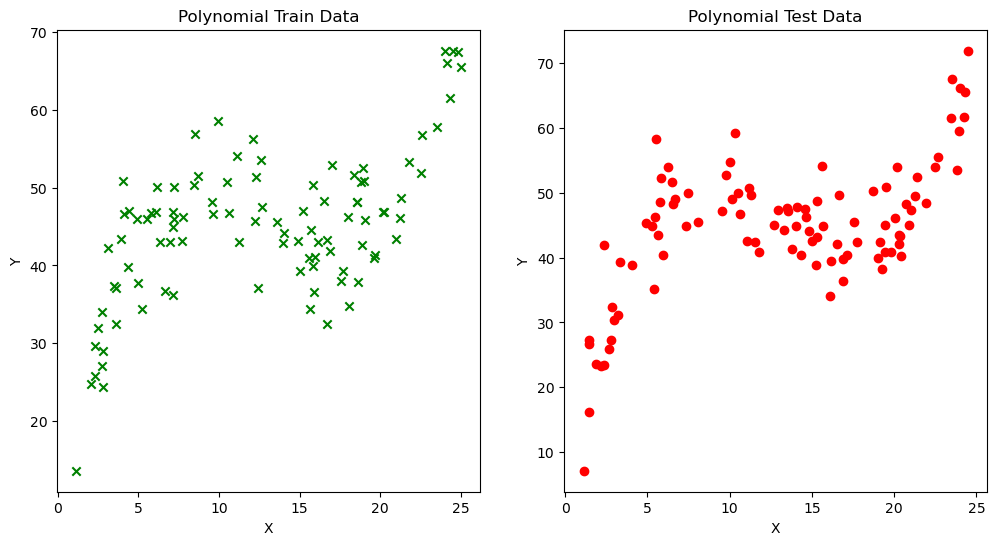

In [3]:
# Plot the training and test data side by side
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].scatter(train_data['X_data'], train_data['Y_data'], marker='x', color='green')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Polynomial Train Data')

ax[1].scatter(test_data['X_data'], test_data['Y_data'], marker='o', color='red')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_title('Polynomial Test Data')

plt.show()

In [4]:
# Euclidean distance function
def euclideanDistance(x1, x2):
    return np.sqrt(np.power(x1 - x2, 2))

# K nearest neighbor function
def knn(dataSet, x_val, k):
    distances = euclideanDistance(dataSet[:, 0], x_val)
    knn = dataSet[distances.argsort()[:k]]
    return knn[:, 1].mean()

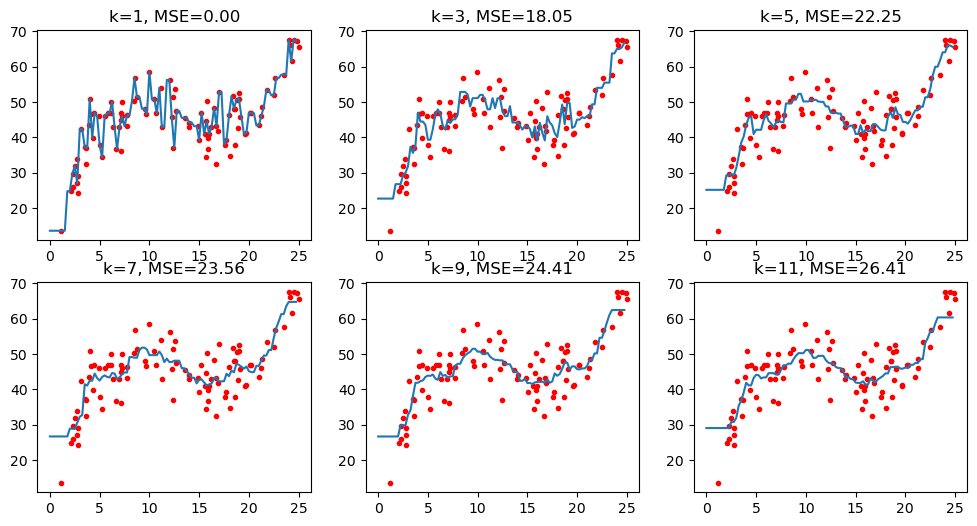

In [5]:
# Start of k-NN regression
plt.figure(figsize=(12, 6))
k_values = [1, 3, 5, 7, 9, 11]

for i, k in enumerate(k_values):
    xy = np.array([[x, knn(train_data.values, x, k)] for x in np.arange(0, 25, 0.25)])
    training_predicted = np.array([[x[0], knn(train_data.values, x[0], k)] for x in train_data.values])
    mse_training = np.mean(np.power(training_predicted[:, 1] - train_data['Y_data'], 2))
    plt.subplot(2, 3, i+1)
    plt.title(f"k={k}, MSE={mse_training:.2f}")
    plt.plot(train_data['X_data'], train_data['Y_data'], 'ro', markersize=3)
    plt.plot(xy[:, 0], xy[:, 1])

plt.show()

In [7]:
# Compute MSE test error for different values of k
for k in k_values:
    test_predicted = np.array([[x[0], knn(train_data.values, x[0], k)] for x in test_data.values])
    mse_test = np.mean(np.power(test_predicted[:, 1] - test_data['Y_data'], 2))
    print(f"k={k}, MSE_test={mse_test:.2f}")

k=1, MSE_test=49.24
k=3, MSE_test=31.58
k=5, MSE_test=28.48
k=7, MSE_test=29.23
k=9, MSE_test=27.70
k=11, MSE_test=30.36


In [8]:
# KNN classifier is a machine learning algorithm used for classification and regression problems. 
# It works by finding the K nearest points in the training dataset and uses their class to 
# predict the class or value of a new data point. It can handle complex data and is also easy to 
# implement, which is why KNN has become a popular tool in the field of artificial intelligence.

# The MSE gives an indication of how well the regression model fits the data. A lower MSE 
# indicates a better fit, as it means that the predicted values are closer to the actual values. 
# However, a very low MSE may also indicate overfitting, where the model is fitting the noise in 
# the data instead of the underlying pattern.

# Based on this info provided by the slides in lecture 1. I would say that the best k is the one 
# closest to zero but not actually zero due to overfitting.  